In [2]:
import pyfor

## Normalization - The Basics

One of the most integral parts of LiDAR analysis is normalizing the point cloud. This is done first by filtering ground points using one of many algorithms. **pyfor** currently implements the progressive morphological ground filter (Zhang et al. 2003) to achieve this.

There are two ways to handle normalization. The first is to normalize the Cloud object. This will normalize the point cloud **in place**. We will soon see that this is just a wrapper for the lower level Grid functions.

In [5]:
# Load the point cloud
# CHANGEME
pc = pyfor.cloud.Cloud("my_las.las")

# Plot the raw cloud
pc.iplot3d(point_size=2)

<img src="images/raw_iplot.png" width="550">

In [3]:
# Call the normalization functions with some useful settings for the algorithm.
pc.normalize(cell_size=0.4, num_windows=7, dh_0= 1, dh_max=2.5)

<img src ="images/norm_iplot.png" width="550">

As we can see, the point cloud is now normalized and ready for metric extraction.

## Digging Deeper

What would normalization be without a ground filter? Let's investigate the behavior of the ground filter below by digging deeper into pyfor.

The implementation of the Zhang et al. (2003) algorithm in pyfor is based off of a rasterized point cloud, specifically the minimum value of the `z` dimension in each cell, with missing values (i.e. empty cells) interpolated using a nearest neighbor algorithm. This is what the interpolated raster looks like: 

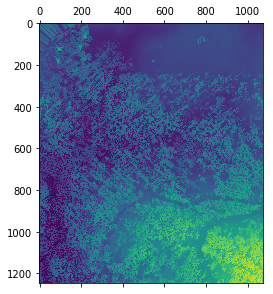

In [5]:
#  Reload an unnormalized point cloud
pc = pyfor.cloud.Cloud("my_las.las")
pc_grid = pc.grid(0.4)

# Plot the interpolated array.
interp_min = pc_grid.interpolate("min", "z")
plt.matshow(interp_min)
plt.show()

Clearly this is not the final product we desire. Just because a given minimum z value exists in a given cell does not mean that point represents the ground. This is where the progressive morphological filter kicks in: we need to filter these "unlikely ground" points from the raster. Here we can directly call the `ground_filter` implementation for our `pc_grid` Grid object. The argument values should look familiar.

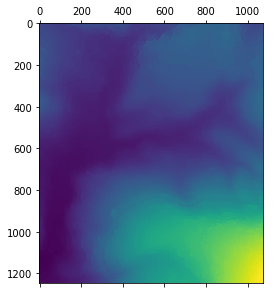

In [6]:
ground_array = pc_grid.ground_filter(num_windows=7, dh_0=1, dh_max=2.5)
plt.matshow(ground_array.array)
plt.show()

The `ground_filter` function is useful because it lets us iteratively decide on correct parameters for our ground filter without affecting the original point cloud data. In other words, `ground_filter` merely produces DEMs, it does not normalize the existing point cloud data.